Task-2

**Movie Ratings Prediction**

PROBLEM STATEMENT:

* Movie Rating Prediction is a project where you aim to build a recommendation system that predicts how a user would rate a movie based on their historical ratings and the ratings of similar
users.

BUSINESS UNDERSTANDING:

* This project involves data collection, data cleaning, and implementing recommendation algorithms. Common algorithms used include user-based collaborative filtering, item-based
collaborative filtering, or matrix factorization techniques.

Import necessary libraries for the analysis

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

**STEP 1 : DATA READING AND UNDERSTANDING**

In [ ]:
import pandas as pd

movies = pd.read_csv('/content/drive/MyDrive/movie rating prediction/movies.dat',sep='::',engine='python',names=['MovieID','MovieName','Genre'],encoding='latin',header=None)
ratings = pd.read_csv('/content/drive/MyDrive/movie rating prediction/ratings.dat', sep='::',engine='python',names=['ID','MovieID','Ratings','TimeStamp'],encoding='latin',header=None)
users = pd.read_csv('/content/drive/MyDrive/movie rating prediction/users.dat', sep='::',engine='python',names=['UserID','Gender','Age','Occupation','Zip-code'],encoding='latin',header=None)

In [ ]:
movies.head()

,MovieID,MovieName,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.shape

(3883, 3)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MovieID    3883 non-null   int64 
 1   MovieName  3883 non-null   object
 2   Genre      3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
movies.dtypes

MovieID       int64
MovieName    object
Genre        object
dtype: object

In [ ]:
ratings.head()

,ID,MovieID,Ratings,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
ratings.shape

(1000209, 4)

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   ID         1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Ratings    1000209 non-null  int64
 3   TimeStamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
ratings.dtypes

ID           int64
MovieID      int64
Ratings      int64
TimeStamp    int64
dtype: object

In [ ]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users.shape

(6040, 5)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
users.dtypes

UserID         int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

We have three different dataframes with common columns in it(one in each two) Lets merge all the dataframes into one.

In [ ]:
ratings=ratings.merge(users,how='inner',left_on='ID',right_on='UserID')

In [ ]:
ratings.head()

,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,1,F,1,10,48067
1,1,661,3,978302109,1,F,1,10,48067
2,1,914,3,978301968,1,F,1,10,48067
3,1,3408,4,978300275,1,F,1,10,48067
4,1,2355,5,978824291,1,F,1,10,48067


In [ ]:
movies=movies.merge(ratings,how='inner',on='MovieID')


In [ ]:
movies.head()

,MovieID,MovieName,Genre,ID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,6,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,8,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,9,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,10,F,35,1,95370


In [ ]:
movies.shape

(1000209, 11)

**STEP 2 : EDA (EXPLORATORY DATA ANALYSIS)**

UNIVARIATE ANALYSIS

In [ ]:
movies.dtypes

MovieID        int64
MovieName     object
Genre         object
ID             int64
Ratings        int64
TimeStamp      int64
UserID         int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

In [ ]:
#Lets see the movie name column
movies['MovieName'].nunique()

3706

In [ ]:
movies.drop_duplicates(subset=['MovieName'], inplace=True)

In [ ]:
movies['MovieName'].nunique()

3706

We can see there are 3706 movies totally for which ratings had been given.and there are no duplicates here.

In [ ]:
#Lets see the Genre column once
movies['Genre'].nunique()

301

In [ ]:
movies.drop_duplicates(subset=['Genre'], inplace=True)

In [ ]:
movies['Genre'].nunique()

301

In [ ]:
movies['Genre'].mode()

0                                             Action
1                                   Action|Adventure
2                         Action|Adventure|Animation
3      Action|Adventure|Animation|Children's|Fantasy
4           Action|Adventure|Animation|Horror|Sci-Fi
                           ...                      
296                              Sci-Fi|Thriller|War
297                                       Sci-Fi|War
298                                         Thriller
299                                              War
300                                          Western
Name: Genre, Length: 301, dtype: object

Here also there are 301 different types of genres in which no duplicates are there.

Ratings is our target column here.

In [ ]:
movies['Ratings'].unique()

array([5, 2, 3, 4, 1])

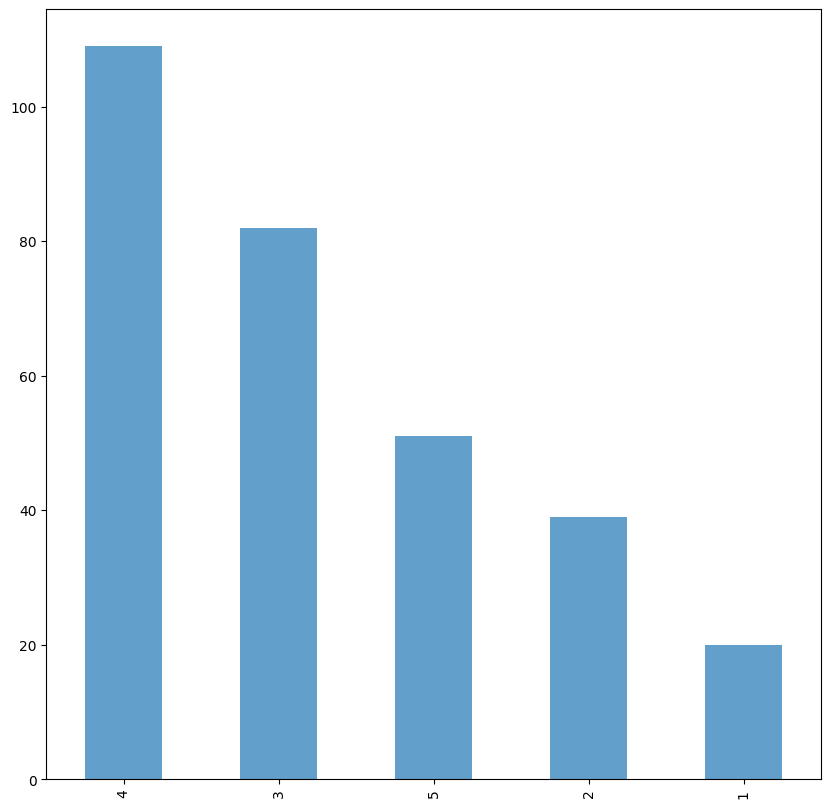

In [ ]:
movies['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

We can see maximum users gave Rating 4 for the movies.

And we know ID and UserID are the id numbers of users who had given the ratings.

In [ ]:
#Lets see timestamp
movies['TimeStamp'].nunique()
movies.drop_duplicates(subset=['TimeStamp'], inplace=True)

In [ ]:
movies['TimeStamp'].nunique()

272

In [ ]:
movies['Gender'].value_counts(normalize=True)

M    0.683824
F    0.316176
Name: Gender, dtype: float64

<Axes: xlabel='count', ylabel='Gender'>

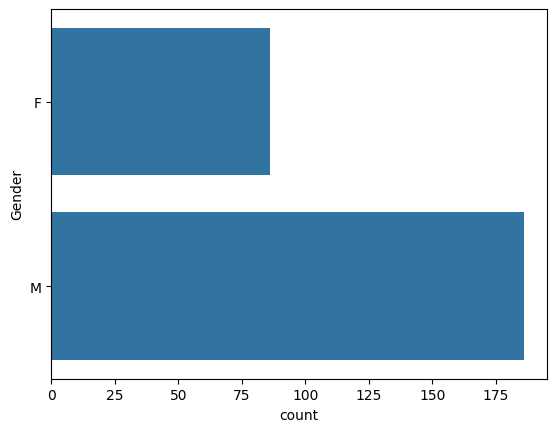

In [ ]:
sns.countplot(data=movies['Gender'])

We can see there are more male users than female.

<Axes: ylabel='Age'>

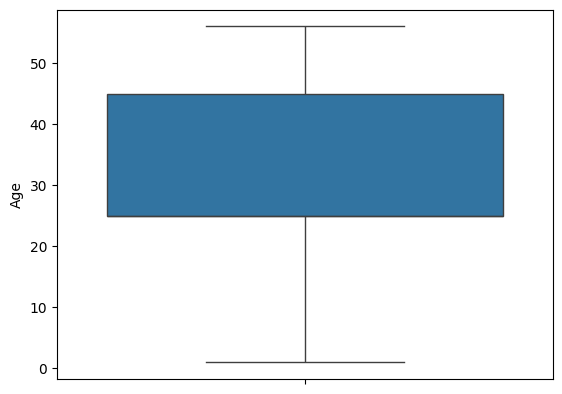

In [ ]:
sns.boxplot(movies['Age'])

In [ ]:
movies['Age'].describe()

count    272.000000
mean      30.970588
std       13.774912
min        1.000000
25%       25.000000
50%       25.000000
75%       45.000000
max       56.000000
Name: Age, dtype: float64

We dont see any outliers here and also the mean and median are almost close.

In [ ]:
#we can create bins for age column for easy interpretation to see the age group
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
movies['age_group'] = pd.cut(movies.Age, range(0, 81, 10), right=False, labels=labels)
movies[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,1,0-9
2077,35,30-39
2778,25,20-29
5120,18,10-19
5290,45,40-49
7211,56,50-59
8451,50,50-59


In [ ]:
movies['Occupation'].unique()

array([10,  1,  7, 12, 20,  4,  0, 13,  9, 16,  3, 19,  8, 15, 17, 11,  2,
       18])

As we can see if occupation is string(object) value and we can see which type of occupation does the user is with but this is a numeric column so this is not helpful for our analysis.

DATA CLEANING AND IMPUTATION OF NULL VALUES

In [ ]:
movies.isnull().sum()

MovieID       0
MovieName     0
Genre         0
ID            0
Ratings       0
TimeStamp     0
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
age_group     0
dtype: int64

There are no null values in the whole dataframe.

BIVARAIATE ANALYSIS

In [ ]:
#Before the bivariate analysis lets group the dataframes by movie name, Ratings and user id
moviename_df=movies.groupby('MovieName')
ratings_df=movies.groupby('Ratings')
userid_df=movies.groupby('UserID')

In [ ]:
print(moviename_df.size().sort_values(ascending=True)[:1000])

MovieName
13th Warrior, The (1999)                 1
Notorious (1946)                         1
Nutty Professor, The (1996)              1
One Magic Christmas (1985)               1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Excalibur (1981)                         1
Evil Dead II (Dead By Dawn) (1987)       1
Event Horizon (1997)                     1
Flight of the Navigator (1986)           1
Young Poisoner's Handbook, The (1995)    1
Length: 272, dtype: int64


In [ ]:
ratings_df.size().sort_values(ascending=False)[:1000]

Ratings
4    98
3    74
5    47
2    34
1    19
dtype: int64

Lets check the movies that are warched by most of the users whose age group is less than or equal to 10.(kids movies)

In [ ]:
display(movies.loc[(movies.Ratings==5) & (movies.Age <=10)])

,MovieID,MovieName,Genre,ID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code,age_group
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,F,1,10,48067,0-9
22893,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,F,1,10,48067,0-9
370615,1287,Ben-Hur (1959),Action|Adventure|Drama,1,5,978302039,1,F,1,10,48067,0-9


Lets filter out the movies other than the above scenario:

In [ ]:
display(movies.loc[(movies.Ratings==5) & (movies.Age >10)])

,MovieID,MovieName,Genre,ID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code,age_group
2077,2,Jumanji (1995),Adventure|Children's|Fantasy,10,5,979168267,10,F,35,1,95370,30-39
3426,5,Father of the Bride Part II (1995),Comedy,26,5,978144881,26,M,25,7,23112,20-29
5188,9,Sudden Death (1995),Action,65,5,986615324,65,M,35,12,55803,30-39
13796,29,"City of Lost Children, The (1995)",Adventure|Sci-Fi,5,5,978245065,5,M,25,20,55455,20-29
34062,110,Braveheart (1995),Action|Drama|War,2,5,978298625,2,M,56,16,70072,50-59
64736,247,Heavenly Creatures (1994),Drama|Fantasy|Romance|Thriller,17,5,978159989,17,M,50,1,95350,50-59
66027,253,Interview with the Vampire (1994),Drama|Horror,8,5,978230943,8,M,25,12,11413,20-29
76518,293,"Professional, The (a.k.a. Leon: The Profession...",Crime|Drama|Romance|Thriller,17,5,978159683,17,M,50,1,95350,50-59
96989,356,Forrest Gump (1994),Comedy|Romance|War,2,5,978299686,2,M,56,16,70072,50-59
148003,541,Blade Runner (1982),Film-Noir|Sci-Fi,10,5,978225630,10,F,35,1,95370,30-39


<Axes: xlabel='age_group', ylabel='Ratings'>

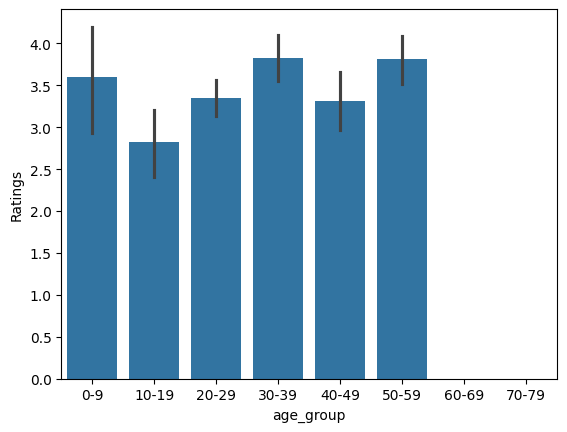

In [ ]:
#Lets see how the Age and Ratings columns are related
sns.barplot(x='age_group',y='Ratings',data=movies)

We can see the users from the age_group 30-39 and 50-59 are likely to give more ratings.

**STEP 3 : MACHINE LEARNING ALGORITHMS (DIFFERENT TYPES)**

Splitting the data into train and test


In [ ]:
#Perform Train test split
X=movies[['MovieID','Age','Occupation']]
y=movies['Ratings']

In [ ]:
X.shape

(272, 3)

In [ ]:
y.shape

(272,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

**Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
log_acc = round(logreg.score(X_train, y_train) * 100, 2)
log_acc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


32.97

**Decision Tree classifier**

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree_acc = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_acc

100.0

**Random forest classifier**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
random_forest_acc = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_acc

100.0

**K Nearest Neighbours classifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
knn_acc = round(knn.score(X_train, y_train) * 100, 2)
knn_acc

54.4

**Gaussian Naive Bayes Algorithm**

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
gaussian_acc = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_acc

36.81

**Support Vector Machines**

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
svc_acc = round(svc.score(X_train, y_train) * 100, 2)
svc_acc

34.07

In [ ]:
#Lets interpret the accuracies of these different models:

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [svc_acc,knn_acc,log_acc,random_forest_acc,gaussian_acc,decision_tree_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
5,Decision Tree,100.00
1,KNN,54.40
4,Naive Bayes,36.81
0,Support Vector Machines,34.07
2,Logistic Regression,32.97


From the above models Decision tree and random forest algortithms both had given 100% accuracy which means these models could be overfitted.
